# Activity 1

In [1]:
import numpy as np

# Constants
m0 = 782.7  # Mass in MeV
Gamma = 8.7  # Width in MeV
N = 1000  # Number of events

# Generate m within the range [m0 - 3Γ, m0 + 3Γ]
m_values = np.random.uniform(m0 - 3 * Gamma, m0 + 3 * Gamma, N)

# Calculate the weight y(m) for each m
weights = (Gamma / 2) / ((m_values - m0) ** 2 + (Gamma / 2) ** 2)

# Sample events with replacement based on the weights
sampled_events = np.random.choice(m_values, size=N, p=weights/np.sum(weights))

#print(sampled_events)


In [2]:
# Generate m within the range [m0 - 3Γ, m0 + 3Γ]
m_values = np.random.uniform(m0 - 3 * Gamma, m0 + 3 * Gamma, N)

# Calculate the weight y(m)
weights = (Gamma / 2) / ((m_values - m0) ** 2 + (Gamma / 2) ** 2)

# Generate random values ri in the range [0, 1]
r_values = np.random.rand(N)

# Accept or reject each event based on the condition
accepted_events = m_values[weights / np.max(weights) > r_values]

#print(accepted_events)


In [3]:
# Generate beta within the range [-π/2, π/2]
beta_values = np.random.uniform(-np.pi/2, np.pi/2, N)

# Calculate m for each beta value
m = m0 + (Gamma / 2) * np.tan(beta_values)

#print(m_values)

# Calculate the weight y(m) for each m
weight = (Gamma / 2) / ((m - m0) ** 2 + (Gamma / 2) ** 2)

# Sample events with replacement based on the weights
sampled_event = np.random.choice(m, size=N, p=weight/np.sum(weight))

#print(sampled_event)

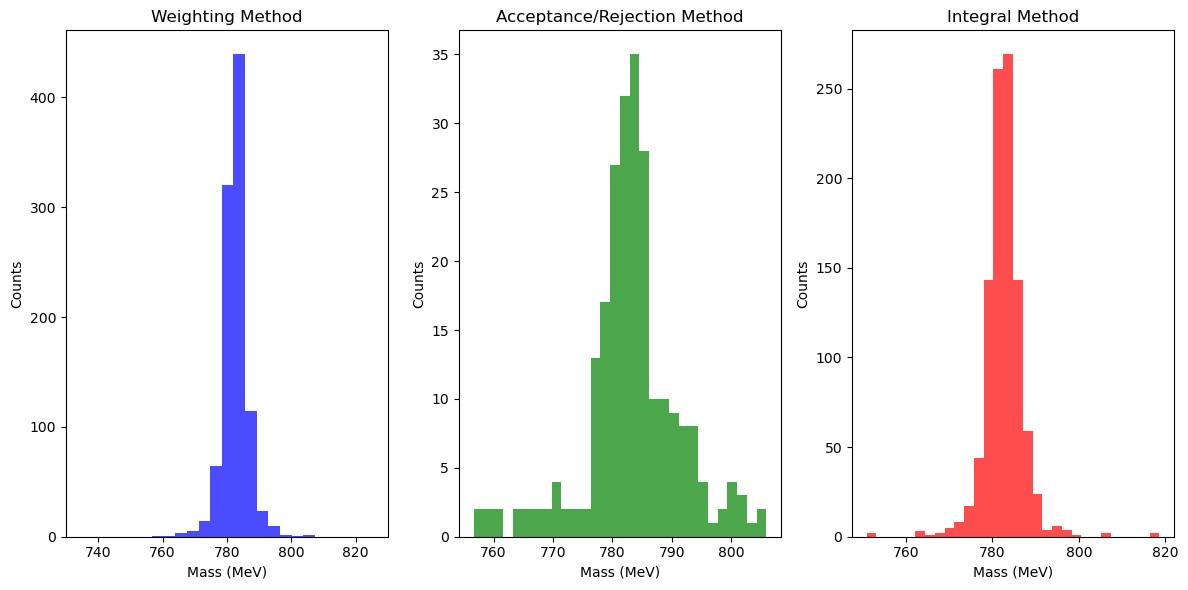

In [22]:
import matplotlib.pyplot as plt

# Plotting Method 1 and Method 2 results
plt.figure(figsize=(12, 6))

# Plot histogram of Method 1 sampled events
plt.subplot(1, 3, 1)
plt.hist(sampled_events, bins=30, alpha=0.7, color='blue', label='Method 1')
plt.xlim(730,830)
plt.title('Weighting Method')
plt.xlabel('Mass (MeV)')
plt.ylabel('Counts')

# Plot histogram of Method 2 accepted events
plt.subplot(1, 3, 2)
plt.hist(accepted_events, bins=30, alpha=0.7, color='green', label='Method 2')
plt.title('Acceptance/Rejection Method')
plt.xlabel('Mass (MeV)')
plt.ylabel('Counts')

# Plot histogram of Method 3 sampled events
plt.subplot(1, 3, 3)
plt.hist(sampled_event, bins=30, alpha=0.7, color='red', label='Method 1')
plt.title('Integral Method')
plt.xlabel('Mass (MeV)')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()



# Activity 2

In [10]:
import numpy as np
from tqdm import trange

def get_t(y_i):
    w = 300.0
    mu = 5.0e+10
    Vd = 200.0
    val = (-(w**2)/(2.0*mu*Vd)) * np.log(y_i/w)
    return val

def diff_rad(t_i):
    D_h = 12.5e+8
    return (2*D_h*t_i)**0.5

def charge(x_min, x_max, rho, x_0):
    dx = 1e-4
    sum_charge = 0
    for x in np.arange(x_min, x_max + dx, dx):
        sum_charge += (2 * np.pi * rho**2)**-0.5 * np.exp(-(x - x_0)**2 / (2 * rho**2))
    return sum_charge

def calculate_xbar(Q, x):
    return np.sum(np.array(x) * Q) / np.sum(Q)

xbars_sums = []
ys = [(5.0 + i * 30.0) for i in range(10)] 
times = []

for _ in trange(1000):    
    x0 = np.random.uniform(-5.0, 5.0)  
    xbars = []
    for i in range(10):
        times.append(get_t(ys[i]))
        rho = diff_rad(times[i])
        Q = [
            charge(-15., -5., rho, x0),
            charge(-5., 5., rho, x0),
            charge(5., 15., rho, x0)
        ]
        xbars.append(calculate_xbar(Q, [-10., 0., 10.]))
    xbars_sums.append(np.sum(xbars) - x0)


100%|█████████████████████████████████████| 1000/1000 [1:26:10<00:00,  5.17s/it]


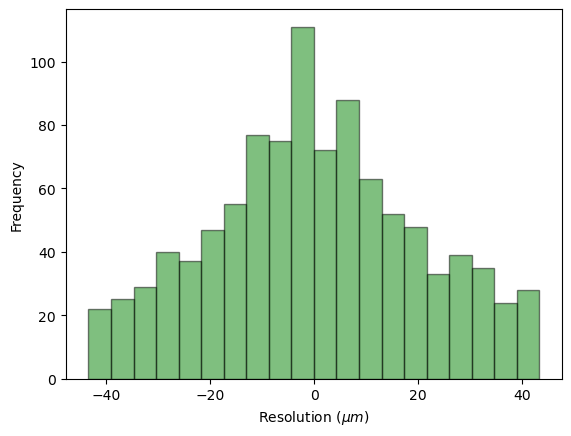

In [15]:
plt.hist(xbars_sums,bins=20,facecolor = 'green', edgecolor = 'black', alpha=0.5)
plt.xlabel("Resolution $(\mu m)$")
plt.ylabel("Frequency")
plt.savefig("resolution.pdf")
plt.show()